# Artificial Intelligence (CS6364-002) 
## Homework 4 - BFS
## Submission by - Adithya Sundararajan Iyer (asi200000)


In this question, we aim to solve the “cliff walking” problem using the BFS (Breadth First Search) method

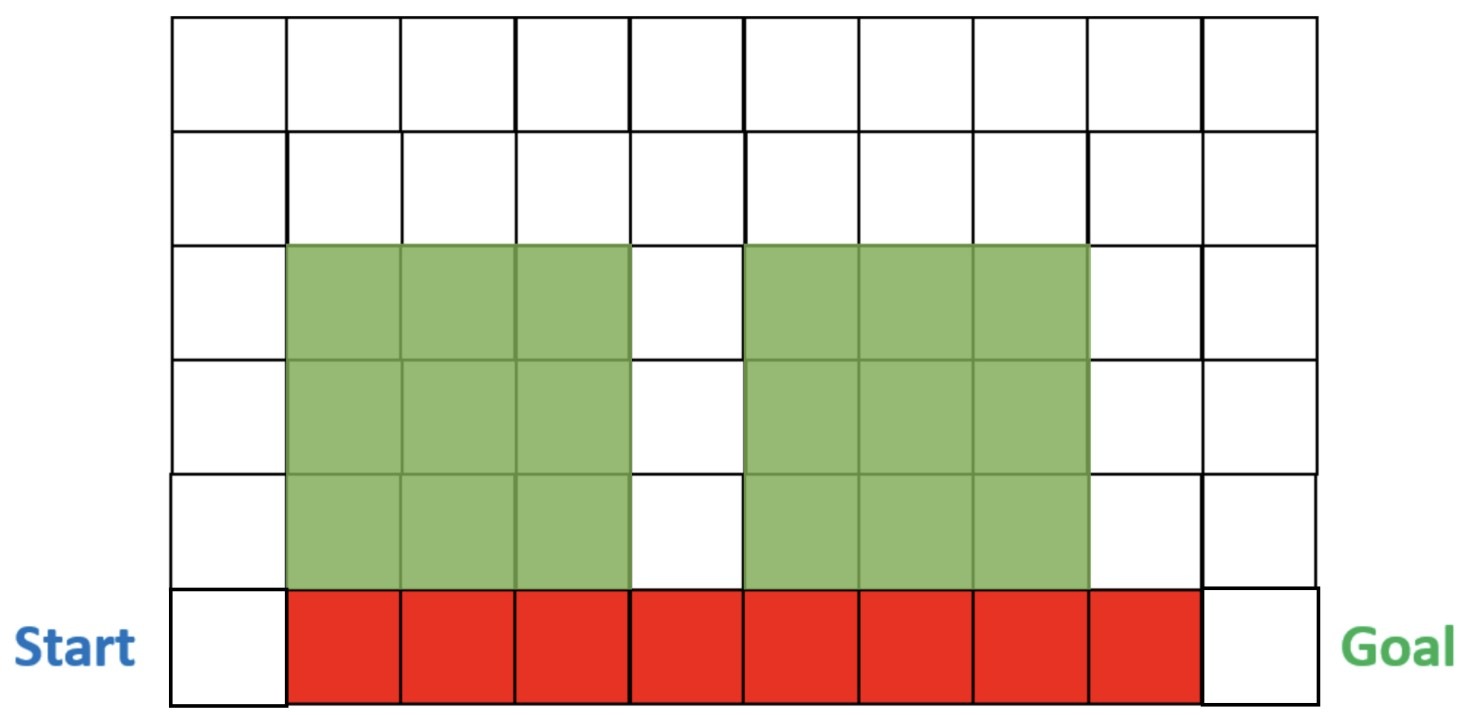

First we initialize the grid with the costs for different regions

In [1]:
import math

# non-water region throughout initially
grid = [[1 for j in range(10)] for i in range(6)] 
grid[-1][0] = 0 # assume zero cost at starting point

# modify cost for water regions
for i in range(2,5):
  for j in range(1,4):
    grid[i][j] = 5
  for j in range(5,8):
    grid[i][j] = 5

# modify cost for cliff = +inf
for j in range(1,9):
  grid[-1][j] = math.inf

print(grid)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 5, 5, 5, 1, 5, 5, 5, 1, 1], [1, 5, 5, 5, 1, 5, 5, 5, 1, 1], [1, 5, 5, 5, 1, 5, 5, 5, 1, 1], [0, inf, inf, inf, inf, inf, inf, inf, inf, 1]]


In [5]:
# Make the visited labels for the coordinates
visited = [[False for j in range(10)] for i in range(6)] 

# now make the parent labels
parent = [[None for j in range(10)] for i in range(6)] 

Implement the BFS algorithm

In [6]:
from queue import Queue

start, goal = (5,0), (5,9) # 0-indexed
q = Queue()
q.put(start)
while(not q.empty()):
  cd = q.get()
  x, y = cd[0], cd[1]
  visited[x][y] = True
  if cd==goal:
    break
  neighbrs = [[x,y+1], [x+1,y], [x,y-1], [x-1,y]]
  for nbr in neighbrs:
    i, j = nbr[0], nbr[1]
    if i<0 or i>=6 or j<0 or j>=10 or visited[i][j] or math.isinf(grid[i][j]):
      continue
    parent[i][j] = cd
    q.put((i,j))


In [7]:
print(visited, '\n\n', parent)

[[True, True, True, True, True, True, False, False, False, False], [True, True, True, True, True, True, True, False, False, False], [True, True, True, True, True, True, True, True, False, False], [True, True, True, True, True, True, True, True, True, False], [True, True, True, True, True, True, True, True, True, True], [True, False, False, False, False, False, False, False, False, True]] 

 [[(1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), None, None, None], [(2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), None, None], [(3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), None], [(4, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8)], [(5, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8)], [None, None, None, None, None, None, None, None, None, (4, 9)]]


For each of the five search methods, please print out the returned path and the cost of the path in the Jupyter notebook.

In [8]:
path = []
node = goal
while(node):
  x, y = node
  path.append((x+1, y+1))
  node = parent[x][y]
path.reverse()
print('Path taken by BFS algorithm:', path)

Path taken by BFS algorithm: [(6, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 10)]


In [10]:
cost = 0
for x,y in path:
  cost += grid[x-1][y-1]
print('Cost of the path using BFS traversal:', cost)

Cost of the path using BFS traversal: 35
